In [1]:
# File with the reviews database
file = '/Users/gkhanna/Downloads/reviews_Home_and_Kitchen_5.json'

In [2]:
import sys

In [3]:
import numpy as np
import os
import pandas as pd
import re

In [4]:
sys.path

['',
 '/Users/gkhanna/Google Drive/210Capstone/code/InsightsFromReviews/app/ai',
 '/Users/gkhanna/anaconda3/lib/python37.zip',
 '/Users/gkhanna/anaconda3/lib/python3.7',
 '/Users/gkhanna/anaconda3/lib/python3.7/lib-dynload',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/gkhanna/.ipython']

In [5]:
!pip3 show tensorflow

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/gkhanna/anaconda3/lib/python3.7/site-packages
Requires: wheel, termcolor, astor, numpy, absl-py, google-pasta, keras-preprocessing, tensorboard, tensorflow-estimator, gast, six, protobuf, wrapt, grpcio, keras-applications
Required-by: 


In [6]:
path = '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages'
sys.path.append(path)

In [7]:
sys.path

['',
 '/Users/gkhanna/Google Drive/210Capstone/code/InsightsFromReviews/app/ai',
 '/Users/gkhanna/anaconda3/lib/python37.zip',
 '/Users/gkhanna/anaconda3/lib/python3.7',
 '/Users/gkhanna/anaconda3/lib/python3.7/lib-dynload',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/gkhanna/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/gkhanna/.ipython',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages']

In [8]:
from insights import features

/Users/gkhanna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: spacy.tokens.span.Span size changed, may indicate binary incompatibility. Expected 72 from C header, got 80 from PyObject
  return f(*args, **kwds)


In [9]:
from insights import languageUtils

In [10]:
from insights import summary

In [11]:
# Load reviews into a dictionary
file_d = features.loadFromDb(file, count = 12000)

10579it [00:00, 105783.80it/s]

12000 Reviews written to the dictionary 


In [12]:
print(len(file_d))

12000


In [13]:
file_d[0]

{'reviewerID': 'APYOBQE6M18AA',
 'asin': '0615391206',
 'reviewerName': 'Martin Schwartz',
 'helpful': [0, 0],
 'reviewText': 'My daughter wanted this book and the price on Amazon was the best.  She has already tried one recipe a day after receiving the book.  She seems happy with it.',
 'overall': 5.0,
 'summary': 'Best Price',
 'unixReviewTime': 1382140800,
 'reviewTime': '10 19, 2013'}

In [14]:

# ASIN corresponding to the Iron Skillet
# pl = 'B00006JSUA'
# pl = 'B000QFDNP8'
pl = ''

In [15]:
reviews_sent, reviews_pos_sent, reviews_neg_sent, sum_sent, sum_pos_sent, sum_neg_sent = summary.loadTolistsAndClassify(file_d, pl, 0)

100%|██████████| 12000/12000 [00:01<00:00, 10676.33it/s]

Processed and Classified 12000 Reviews
11116 Positive reviews
884 Negative reviews


In [16]:
num_samples = len(sum_sent)

In [17]:
sum_neg_sent[1]

'_start_ not the best _end_'

In [18]:
reviews_neg_sent[3]

'bag tore with almost nothing in it   just caught the corner of a small cracker box and that was that  pretty disappointed '

In [19]:
reviews_sent[3]

'this book is a must have if you get a zoku  which i also highly recommend   there is a large variety of recipes from simple  to fancy  the flavor combos are creative  and it gives you ideas for decorating the pops too  they turn out as beautiful as they are tasty  after reading it you will be inspired to create your own recipes too '

In [20]:
sum_sent[3]

'_start_ creative combos _end_'

### Word counts in reviews and summaries
We'll get another validation of this after tokenization

In [21]:
import matplotlib.pyplot as plt

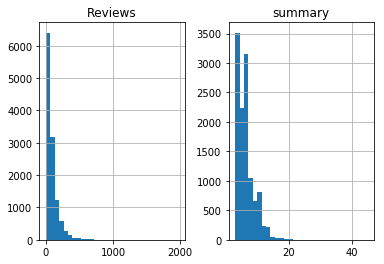

In [22]:
reviews_word_count = []
sum_word_count = []

for i in reviews_sent:
      reviews_word_count.append(len(i.split()))

for i in sum_sent:
      sum_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Reviews':reviews_word_count, 'summary':sum_word_count})
length_df.hist(bins = 30)
plt.show()

In [23]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gkhanna/anaconda3/lib/python3.7/site-packag

## Tokenize: text_to_word_sequence

In [24]:
# VOCAB_SIZE = 800
# tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

In [25]:
# We've already cleaned up the data
# Though we could use this for cleaning also
reviews_tokenizer = Tokenizer()

In [26]:
r_tokenizer = Tokenizer()
r_tokenizer.fit_on_texts(reviews_sent)
reviews_sequences = r_tokenizer.texts_to_sequences(reviews_sent)
reviews_word_index = r_tokenizer.word_index
len(reviews_word_index)

20490

In [27]:
s_tokenizer = Tokenizer()
s_tokenizer.fit_on_texts(sum_sent)
summary_sequences = s_tokenizer.texts_to_sequences(sum_sent)
sum_word_index = s_tokenizer.word_index
len(sum_word_index)

4479

In [28]:
reviews_vocab_size = len(reviews_word_index) + 1
reviews_vocab_size

20491

In [29]:
sum_vocab_size = len(sum_word_index) + 1
sum_vocab_size

4480

### Max len of the sequences

In [30]:
max_reviews_seq_len = max([len(seq) for seq in reviews_sequences])
max_reviews_seq_len

1978

In [31]:
max_summary_seq_len = max([len(seq) for seq in summary_sequences])
max_summary_seq_len

45

### Vocabulary size

In [32]:
# VOCAB_SIZE = len(reviews_word_index) - 10
# VOCAB_SIZE

In [33]:
# reviews_word_index_vsize = {}
# counter = 0
# for word in reviews_word_index.keys():
#     if reviews_word_index[word] == 0:
#         print("found 0!")
#         break
#     if reviews_word_index[word] > VOCAB_SIZE:
#         continue
#     else:
#         reviews_word_index_vsize[word] = reviews_word_index[word]
#         counter += 1

In [34]:
# len(reviews_word_index_vsize)

In [35]:
# sum_word_index_vsize = {}
# counter = 0
# for word in sum_word_index.keys():
#     if sum_word_index[word] == 0:
#         print("found 0!")
#         break
#     if sum_word_index[word] > VOCAB_SIZE:
#         continue
#     else:
#         sum_word_index_vsize[word] = sum_word_index[word]
#         counter += 1

In [36]:
# len(sum_word_index_vsize)

### Padding

In [37]:
from keras.preprocessing.sequence import pad_sequences
# MAX_LEN = max_reviews_seq_len
pad_reviews_sequences = pad_sequences(reviews_sequences, maxlen=max_reviews_seq_len, padding='post', truncating='post')

In [38]:
print(len(reviews_sequences[0]), len(pad_reviews_sequences[0]))

30 1978


In [39]:
print(pad_reviews_sequences)

[[ 17 705 310 ...   0   0   0]
 [  2  77   9 ...   0   0   0]
 [ 92   7  57 ...   0   0   0]
 ...
 [  9   7   5 ...   0   0   0]
 [  9 762 360 ...   0   0   0]
 [  2  25  82 ...   0   0   0]]


In [40]:
pad_reviews_sequences.shape

(12000, 1978)

In [41]:
pad_sum_sequences = pad_sequences(summary_sequences, maxlen=max_summary_seq_len, padding='post', truncating='post')

In [42]:
print(len(summary_sequences[0]), len(pad_sum_sequences[0]))

4 45


In [43]:
pad_sum_sequences.shape

(12000, 45)

### Reshape

In [44]:
encoder_inputs = np.zeros((num_samples, max_reviews_seq_len), dtype='float32')
encoder_inputs.shape

for i, seqs in enumerate(pad_reviews_sequences):
    for j, seq in enumerate(seqs):
        encoder_inputs[i, j] = seq
        

In [45]:
encoder_inputs.shape

(12000, 1978)

In [46]:

decoder_inputs = np.zeros((num_samples, max_summary_seq_len), dtype='float32')
decoder_inputs.shape
        
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        decoder_inputs[i, j] = seq

In [47]:
decoder_inputs.shape

(12000, 45)

In [48]:
decoder_outputs = np.zeros((num_samples, max_summary_seq_len, sum_vocab_size), dtype='float32')
decoder_outputs.shape

(12000, 45, 4480)

In [49]:
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        if j > 0:
            decoder_outputs[i, j-1, seq] = 1.

In [50]:
decoder_outputs.shape

(12000, 45, 4480)

## Glove embeddings

In [51]:
embeddings_index = {}
with open('/Users/gkhanna/Downloads/glove.6B/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [52]:
embeddings_index['start'].shape

(100,)

In [53]:
def embedding_matrix_creater(embedding_dimension, word_index):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimension))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [54]:
# Hyperparams


EMBEDDING_DIM = 100


In [55]:
reviews_embedding_matrix = embedding_matrix_creater(EMBEDDING_DIM, word_index=reviews_word_index)
reviews_embedding_matrix.shape

(20491, 100)

In [56]:
len(reviews_embedding_matrix)

20491

In [57]:
sum_embedding_matrix = embedding_matrix_creater(EMBEDDING_DIM, word_index=sum_word_index)
sum_embedding_matrix.shape

(4480, 100)

In [58]:
from numpy.random import seed
seed(1)

In [59]:
import logging

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
import keras
from keras import backend as k
k.clear_session()
k.set_learning_phase(1)

W0730 16:09:32.464920 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0730 16:09:32.466200 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0730 16:09:32.487793 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [62]:
from keras.preprocessing.text import Tokenizer
from keras import initializers
from keras.optimizers import RMSprop
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,Input,Activation,Add,concatenate, Embedding, RepeatVector
from keras.layers.advanced_activations import LeakyReLU,PReLU
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam


In [63]:
from keras.layers import TimeDistributed, Concatenate

In [64]:
from insights.attention import AttentionLayer

### Hyperparams

In [65]:
# Hyperparams

# MAX_LEN = 1000
# VOCAB_SIZE = len(sum_embedding_matrix)
# EMBEDDING_DIM = 200
HIDDEN_UNITS = 100
# VOCAB_SIZE = VOCAB_SIZE + 1

LEARNING_RATE = 0.0005
BATCH_SIZE = 5
EPOCHS = 20

### Embedding Layer

In [66]:
# encoder_embedding_layer = Embedding(input_dim = reviews_vocab_size, 
#                                     output_dim = EMBEDDING_DIM,
#                                     input_length = max_reviews_seq_len,
#                                     weights = [reviews_embedding_matrix],
#                                     trainable = False)

# decoder_embedding_layer = Embedding(input_dim = sum_vocab_size, 
#                                     output_dim = EMBEDDING_DIM,
#                                     input_length = max_summary_seq_len,
#                                     weights = [sum_embedding_matrix],
#                                     trainable = False)

In [67]:
encoder_embedding_layer = Embedding(input_dim = reviews_vocab_size, 
                                    output_dim = EMBEDDING_DIM,
                                    weights = [reviews_embedding_matrix],
                                    trainable = False)

decoder_embedding_layer = Embedding(input_dim = sum_vocab_size, 
                                    output_dim = EMBEDDING_DIM,
                                    weights = [sum_embedding_matrix],
                                    trainable = False)

In [68]:
sum_vocab_size

4480

## Model

### LSTM

In [69]:
## # encoder
encoder_inputs = Input(shape=(max_reviews_seq_len, ), dtype = 'int32',)
encoder_embedding = encoder_embedding_layer(encoder_inputs)

# LSTM 1
encoder_LSTM1 = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
encoder_output1, state_h1, state_c1 = encoder_LSTM1(encoder_embedding)

# LSTM 2
encoder_LSTM2 = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
encoder_outputs, state_h, state_c = encoder_LSTM2(encoder_output1)


encoder_states = [state_h, state_c]

# decoder
# decoder_inputs = Input(shape=(max_summary_seq_len, ), dtype = 'int32')
decoder_inputs = Input(shape=(None, ), dtype = 'int32')
decoder_embedding = decoder_embedding_layer(decoder_inputs)

# Decoder LSTM with encoder_states as the initial state
decoder_LSTM = LSTM(HIDDEN_UNITS, return_sequences = True, return_state = True)
decoder_outputs, state_d_h, state_d_c = decoder_LSTM(decoder_embedding, initial_state = [state_h, state_c])

# Dense Layer
decoder_dense = TimeDistributed(Dense(units=sum_vocab_size, activation="softmax"))
decoder_outputs = decoder_dense(decoder_outputs) # SUM_VOCAB_SIZE, sum_embedding_matrix.shape[1]

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()


W0730 16:09:32.555334 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 16:09:32.567779 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1978)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1978, 100)    2049100     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 1978, 100),  80400       embedding_1[0][0]                
__________________________________________________________________________________________________
embedding_

In [70]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

W0730 16:09:33.541301 140736209961856 deprecation_wrapper.py:119] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## TRAINING

In [71]:
# history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

In [72]:
num_samples = len(pad_sum_sequences)
decoder_output_data = np.zeros((num_samples, max_summary_seq_len, sum_vocab_size), dtype="int32")


In [73]:
pad_sum_sequences.shape

(12000, 45)

In [74]:
decoder_output_data.shape

(12000, 45, 4480)

In [75]:
# Output
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        if j > 0:
            decoder_output_data[i][j - 1][seq] = 1

In [76]:
reviews_train, reviews_test, sum_train, sum_test = train_test_split(pad_reviews_sequences, pad_sum_sequences, test_size=0.2, shuffle = False)

In [77]:
train_num = reviews_train.shape[0]
train_num

9600

In [78]:
reviews_train.shape

(9600, 1978)

In [79]:
reviews_test[5]

array([ 2, 77, 87, ...,  0,  0,  0], dtype=int32)

In [80]:
reviews_test.shape

(2400, 1978)

In [81]:
sum_train.shape

(9600, 45)

In [82]:
sum_test[4]

array([  1, 734, 101,  24,  18, 583,  15, 553,   2,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=int32)

In [83]:
sum_test.shape

(2400, 45)

In [84]:
target_train = decoder_output_data[:train_num]
target_test = decoder_output_data[train_num:]

In [85]:
target_train.shape

(9600, 45, 4480)

In [86]:
target_test.shape

(2400, 45, 4480)

In [87]:
target_train.shape

(9600, 45, 4480)

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
history = model.fit([reviews_train, sum_train], 
                     target_train, 
                     epochs=EPOCHS,
                     callbacks = [es],
                     batch_size=BATCH_SIZE,
                     validation_data=([reviews_test, sum_test], target_test))

W0730 16:09:36.131860 140736209961856 deprecation.py:323] From /Users/gkhanna/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9600 samples, validate on 2400 samples
Epoch 1/20
9600/9600 [==============================] - 17710s 2s/step - loss: 0.6838 - acc: 0.9067 - val_loss: 0.6525 - val_acc: 0.9091
Epoch 2/20
9600/9600 [==============================] - 6298s 656ms/step - loss: 0.5872 - acc: 0.9128 - val_loss: 0.6407 - val_acc: 0.9105
Epoch 3/20
4440/9600 [============>.................] - ETA: 53:16 - loss: 0.5659 - acc: 0.9148

In [ ]:
decoder_outputs.shape

In [ ]:
decoder_inputs.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Reverse Tokenize

In [ ]:
reverse_source_word_index=r_tokenizer.index_word 
reverse_target_word_index=s_tokenizer.index_word 
target_word_index = s_tokenizer.word_index

In [ ]:
len(reverse_source_word_index)

### inference encoder and decoder

In [ ]:
# Encoder inference
inf_encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

In [ ]:
# Decoder inference

# State of the previous time step
decoder_state_input_h = Input(shape=(HIDDEN_UNITS,))
decoder_state_input_c = Input(shape=(HIDDEN_UNITS,))
# decoder_hidden_state_input = Input(shape=(max_reviews_seq_len, HIDDEN_UNITS))

# Embeddings of the decoder sequence
decoder_embeddings2 = decoder_embedding_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_LSTM(decoder_embeddings2, initial_state= [decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

# decoder_outputs, state_h, state_c = decoder_LSTM(decoder_embedding,  initial_state=decoder_state_inputs)
# decoder_states = [state_h, state_c]
# decoder_outputs = decoder_dense(decoder_outputs)
# inf_decoder_model = Model([decoder_inputs] + decoder_state_inputs, [decoder_outputs] + decoder_states)

In [ ]:
inf_encoder_model.summary()

In [ ]:
decoder_model.summary()

## Inference process

In [ ]:


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = inf_encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # target_seq = np.array([0.0 for _ in range(max_reviews_seq_len)]).reshape(1, max_reviews_seq_len)

    # Choose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']
    
#     target_seq = np.zeros((1, 1, max_summary_seq_len))
#     target_seq[0, 0, target_word_index['start']] = 1.

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])

        # Sample a token
        sampled_word_index = np.argmax(output_tokens[0, -1, :])
        # print(sampled_token_index)
        # sampled_token = reverse_target_word_index[sampled_token_index]
        # Want to get a default instead of a key error
        sampled_word = reverse_target_word_index.get(sampled_word_index, "NA")
        # print(sampled_token)
        
        # if(sampled_token!='end'):
        decoded_sentence += ' ' + sampled_word

        # Exit condition: either hit max length or find stop word.
        if (sampled_word == 'end' or len(decoded_sentence.split()) > (max_summary_seq_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_word_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# Integer sequence to words

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2review(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(len(reviews_test[:10])):
    print("Review:",seq2review(reviews_test[i]))
    print()
    print("Original summary:",seq2summary(sum_test[i]))
    print()
    print("Predicted summary:",decode_sequence(reviews_test[i].reshape(1, max_reviews_seq_len)))
    print("\n")

In [ ]:
seq2review(reviews_train[3])

In [ ]:
seq2summary(sum_train[3])

In [ ]:
# state = inf_encoder_model.predict(reviews_test)

In [ ]:

# cardinality = 720
# n_steps = 4
# output = list()

# target_seq = np.array([0.0 for _ in range(cardinality)]).reshape(1, cardinality)

# yhat, h, c = inf_decoder_model.predict([target_seq] + state)
# # store prediction
# output.append(yhat[0,0,:])
# # update state
# state = [h, c]
    

In [ ]:
# def lookup(tokenizer, vec, returnIntNotWord=True):
#     twordkey = [(k, tokenizer.word_index[k]) for k in sorted(tokenizer.word_index, key=tokenizer.word_index.get, reverse=False)]
#     oneHotVec = [] #captures the index of the ords
#     engVec = [] #this one returns the indexs and the words. Make sure returnIntNotWord is false though
#     for eachRow, notUsed in enumerate(vec):
#         for index, item in enumerate(vec[0]):
#             if vec[eachRow][index] == 1:
#                 oneHotVec.append(index)
#     for index in oneHotVec:
#         engVec.append(twordkey[index])
#     if returnIntNotWord == True:
#         return oneHotVec
#     else:
#         return engVec

In [ ]:
input_seq = reviews_test[0].reshape(1, max_reviews_seq_len)
input_seq.shape

In [ ]:
reviews_test[0].shape

In [ ]:
reviews_test[0]

In [ ]:
e_out, e_h, e_c = inf_encoder_model.predict(input_seq)

In [ ]:
e_out.shape

In [ ]:
e_h.shape

In [ ]:
target_seq = np.zeros((1,1))

In [ ]:
target_seq.shape

In [ ]:
target_seq[0, 0] = target_word_index['start']

In [ ]:
target_seq[0, 0]

In [ ]:
output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])

In [ ]:
output_tokens.shape

In [ ]:
output_tokens

In [ ]:
sampled_token_index = np.argmax(output_tokens[0, -1, :])

In [ ]:
sampled_token_index

In [ ]:
out = output_tokens[0, -1, :]

In [ ]:
out.shape

In [ ]:
reverse_target_word_index.get(sampled_token_index, "NA")

In [ ]:
target_seq = np.zeros((1,1))
target_seq[0, 0] = sampled_token_index

In [ ]:
e_h, e_c = h, c

In [ ]:
output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])

In [ ]:
sampled_token_index = np.argmax(output_tokens[0, -1, :])
reverse_target_word_index.get(sampled_token_index, "NA")